In [1]:
%matplotlib inline

import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Helper function: Cosine distance

In [2]:
def cosine_distance(v1, v2):
    dotprod = np.dot(v1, v2)
    mag_v1 = np.sum(np.sqrt(np.power(v1, 2)))
    mag_v2 = np.sum(np.sqrt(np.power(v2, 2)))
    dist = dotprod/(mag_v1*mag_v2)
    
    return dist

## Schematic representational similarity matrices

In [3]:
movies = {'[P, H, R]': [1, 1, 1],
         '[P, H, A]': [1, 1, -1],
         '[P, F, R]': [1, -1, 1],
         '[P, F, A]':[1, -1, -1],
         '[N, H, R]': [-1, 1, 1],
         '[N, H, A]': [-1, 1, -1],
         '[N, F, R]': [-1, -1, 1],
         '[N, F, A]': [-1, -1, -1]}

movie_df = pd.DataFrame([(m1, v1, m2, v2, cosine_distance(v1, v2))
                          for m1, v1 in movies.items() for m2, v2 in movies.items()],
                          columns = ['movie1', 'feat1', 'movie2', 'feat2', 'Features'])

In [4]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    ax = sns.heatmap(d, **kwargs)
    return ax

In [5]:
self_preferences = [1, 0, 0]
other_preferences = [0, 1, 0]

In [6]:
movie_df['self1'] = [np.multiply(f, self_preferences) for f in movie_df['feat1']]
movie_df['self2'] = [np.multiply(f, self_preferences) for f in movie_df['feat2']]
movie_df['Self'] = [cosine_distance(s1, s2) for s1, s2 in zip(movie_df['self1'], movie_df['self2'])]

In [7]:
movie_df['other1'] = [np.multiply(f, other_preferences) for f in movie_df['feat1']]
movie_df['other2'] = [np.multiply(f, other_preferences) for f in movie_df['feat2']]
movie_df['Other'] = [cosine_distance(s1, s2) for s1, s2 in zip(movie_df['other1'], movie_df['other2'])]

In [8]:
distance_df = movie_df.copy()
distance_df = distance_df[['movie1', 'movie2', 'Features', 'Self', 'Other']]
distance_df = pd.melt(distance_df, id_vars = ['movie1', 'movie2'],
                      value_vars=['Features', 'Self', 'Other'],
                      var_name='Reference frame',
                      value_name='Distance')
distance_df[:10]

,movie1,movie2,Reference frame,Distance
0,"[P, H, R]","[P, H, R]",Features,0.333333
1,"[P, H, R]","[P, H, A]",Features,0.111111
2,"[P, H, R]","[P, F, R]",Features,0.111111
3,"[P, H, R]","[P, F, A]",Features,-0.111111
4,"[P, H, R]","[N, H, R]",Features,0.111111
5,"[P, H, R]","[N, H, A]",Features,-0.111111
6,"[P, H, R]","[N, F, R]",Features,-0.111111
7,"[P, H, R]","[N, F, A]",Features,-0.333333
8,"[P, H, A]","[P, H, R]",Features,0.111111
9,"[P, H, A]","[P, H, A]",Features,0.333333


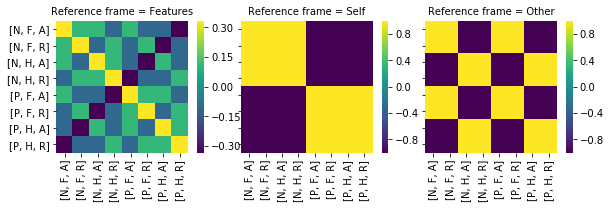

In [9]:
fg = sns.FacetGrid(distance_df, col='Reference frame', gridspec_kws={"wspace":0})
fg.map_dataframe(draw_heatmap, 'movie1', 'movie2', 'Distance', cmap='viridis', square = True)
for ax in fg.axes.flat:
    # set aspect of all axis
    ax.set(xlabel='', ylabel='')